In [ ]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,75671.000000,75671.000000,75671.000000,75671.000000,75671.000000,75671.000000,75671.000000,75671.000000,75671.000000,75671.000000,...,75670.000000,75670.000000,75670.000000,75670.000000,75670.000000,75670.000000,75670.000000,75670.000000,75670.000000,75670.000000
mean,36193.207173,-0.252269,-0.028532,0.679187,0.165888,-0.274340,0.097744,-0.113685,0.054971,0.002703,...,-0.029042,-0.105222,-0.038332,0.006992,0.135088,0.025107,0.002372,0.003148,97.366062,0.002432
std,14851.776098,1.875352,1.659026,1.400937,1.370140,1.386027,1.304902,1.251640,1.231437,1.150810,...,0.734553,0.636195,0.619735,0.596355,0.439952,0.498120,0.388440,0.325450,270.801422,0.049252
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,29864.500000,-1.014585,-0.595764,0.190457,-0.725451,-0.891860,-0.640608,-0.604594,-0.141564,-0.678889,...,-0.225034,-0.524132,-0.178517,-0.324095,-0.128531,-0.327424,-0.063032,-0.005706,7.680000,0.000000
50%,39129.000000,-0.246740,0.070406,0.766869,0.185226,-0.306681,-0.153046,-0.073330,0.068138,-0.080878,...,-0.059341,-0.079474,-0.050643,0.063547,0.173333,-0.073586,0.009390,0.022866,26.720000,0.000000
75%,47574.000000,1.153659,0.724061,1.398814,1.048562,0.263600,0.491598,0.418256,0.346976,0.642829,...,0.116876,0.309343,0.080094,0.404621,0.422072,0.305913,0.082430,0.075946,89.000000,0.000000
max,56191.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
# check for missing values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
percentage_fraudulent = 100 * df[df.Class == 1].shape[0]/df[df.Class == 0].shape[0]
print('The percentage of fraudulent transactions is : %.2f percent' % percentage_fraudulent )

The percentage of fraudulent transactions is : 0.24 percent


In [ ]:
features_list = list(df.columns)
features_list.remove("Class")
print(features_list)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [ ]:
corr_Class = df.corr()['Class']
print(corr_Class)

Time     -0.015537
V1       -0.170982
V2        0.142525
V3       -0.340238
V4        0.183246
V5       -0.166246
V6       -0.082019
V7       -0.273957
V8        0.127651
V9       -0.134594
V10      -0.304187
V11       0.205182
V12      -0.309356
V13       0.004151
V14      -0.392613
V15       0.002322
V16      -0.281084
V17      -0.441090
V18      -0.180523
V19       0.051382
V20       0.022105
V21       0.056312
V22      -0.005868
V23      -0.015636
V24      -0.006942
V25       0.011767
V26       0.007069
V27       0.074462
V28       0.006904
Amount   -0.000352
Class     1.000000
Name: Class, dtype: float64


In [ ]:
corr_Class = df.corr()['Class']
print(corr_Class)

Time     -0.015537
V1       -0.170982
V2        0.142525
V3       -0.340238
V4        0.183246
V5       -0.166246
V6       -0.082019
V7       -0.273957
V8        0.127651
V9       -0.134594
V10      -0.304187
V11       0.205182
V12      -0.309356
V13       0.004151
V14      -0.392613
V15       0.002322
V16      -0.281084
V17      -0.441090
V18      -0.180523
V19       0.051382
V20       0.022105
V21       0.056312
V22      -0.005868
V23      -0.015636
V24      -0.006942
V25       0.011767
V26       0.007069
V27       0.074462
V28       0.006904
Amount   -0.000352
Class     1.000000
Name: Class, dtype: float64


In [ ]:
corr_Class = corr_Class[:-1].abs().sort_values(ascending = False)
corr_Class

,Class
V17,0.441090
V14,0.392613
V3,0.340238
V12,0.309356
V10,0.304187
V16,0.281084
V7,0.273957
V11,0.205182
V4,0.183246
V18,0.180523


In [ ]:
relevant_features = list(corr_Class[np.abs(corr_Class) > 0.09].index)
print(relevant_features)

['V17', 'V14', 'V3', 'V12', 'V10', 'V16', 'V7', 'V11', 'V4', 'V18', 'V1', 'V5', 'V2', 'V9', 'V8']


In [ ]:
X = df.loc[:, relevant_features]
y = df['Class']
print(df['Class'].isnull().sum())
print('Shape of X: ' , X.shape)
print('Shape of y: ' , y.shape)

1
Shape of X:  (75671, 15)
Shape of y:  (75671,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('Shape of X_train: ' , X_train.shape)
print('Shape of y_train: ' , y_train.shape)
print('\nShape of X_test: ' , X_test.shape)
print('Shape of y_test: ' , y_test.shape)

Shape of X_train:  (56753, 15)
Shape of y_train:  (56753,)

Shape of X_test:  (18918, 15)
Shape of y_test:  (18918,)


In [ ]:
print(X_test)

            V17       V14        V3       V12       V10       V16        V7  \
21271 -0.480277 -0.008997  1.105649  0.433770 -0.039389  0.506421 -0.805439   
30218 -0.151315  0.134542 -0.098633 -0.132004 -0.084589 -0.600556  0.107901   
26931 -0.554281  0.242177  0.016829  0.195300 -0.051870  0.264887  0.221522   
5073   0.369626  0.916249  0.104242 -2.059969 -0.683753  0.652377  0.051956   
45512  1.184954 -1.692515  1.481391 -0.314629  0.143052  0.895604  0.362242   
...         ...       ...       ...       ...       ...       ...       ...   
51793  0.205928 -0.625707  1.488707 -1.067484  1.088987 -0.198767 -0.337252   
25202  0.285468  0.186549  0.452190  0.012665  0.759789  1.095995 -0.686600   
3396  -0.073880  0.174107  1.048073  0.465068 -0.154735  0.285563 -0.786240   
4246   1.567286  1.133784  0.792134 -2.142488  0.101661  0.469074 -0.667352   
56763  0.288331  0.869419 -0.215743 -0.050209 -1.098835 -0.736228  0.201724   

            V11        V4       V18        V1      

In [ ]:
# %% [code]
X = df.loc[:, relevant_features]
y = df['Class']
print('Shape of X: ' , X.shape)
print('Shape of y: ' , y.shape)

Shape of X:  (75671, 15)
Shape of y:  (75671,)


In [ ]:
# %% [code]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('Shape of X_train: ' , X_train.shape)
print('Shape of y_train: ' , y_train.shape)
print('\nShape of X_test: ' , X_test.shape)
print('Shape of y_test: ' , y_test.shape)

Shape of X_train:  (56753, 15)
Shape of y_train:  (56753,)

Shape of X_test:  (18918, 15)
Shape of y_test:  (18918,)


In [ ]:
print(relevant_features)
X = df.loc[:, relevant_features]
y = df['Class']
print('Shape of X: ' , X.shape)
print('Shape of y: ' , y.shape)

['V17', 'V14', 'V3', 'V12', 'V10', 'V16', 'V7', 'V11', 'V4', 'V18', 'V1', 'V5', 'V2', 'V9', 'V8']
Shape of X:  (75671, 15)
Shape of y:  (75671,)


In [ ]:
print(df.head())
print(df.columns)
print(relevant_features)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
print('Shape of X_train before scaling:', X_train.shape)

Shape of X_train before scaling: (56753, 15)


In [ ]:
print(X_train.shape)
print(X_train.head())


(56753, 15)
            V17       V14        V3       V12       V10       V16        V7  \
21096 -0.259225 -1.603538  2.989155  0.978159 -0.590724 -0.244473 -0.369584   
25588 -0.456404 -0.002015 -0.391479 -1.005332  0.080415  1.454209 -0.566007   
51800 -0.382056  0.001860  1.141220  0.741109  0.578057  0.477644 -0.062228   
6280   0.663797  2.048391  2.054227 -2.583131  0.399833  0.020311  0.239295   
49110  0.491888 -0.360533  1.577647 -0.320214  0.385570 -0.283906 -0.783090   

            V11        V4       V18        V1        V5        V2        V9  \
21096 -0.774419  0.424337  0.945101 -0.678124 -0.458720 -0.186876  0.982392   
25588 -0.306214 -2.525857 -0.767326 -1.204503  2.969665 -1.457192 -1.500708   
51800  0.203206  2.500945 -1.021577  1.104883 -0.262564  0.586354 -0.785728   
6280   1.998209  2.761479  0.398670 -0.383562  0.537922  1.342420 -0.471197   
49110 -1.114512  2.958998 -0.671741  1.043038 -0.942493 -0.029295  0.673066   

             V8  
21096  0.403119  
25

In [ ]:
print(relevant_features)
print(all(feature in df.columns for feature in relevant_features))


['V17', 'V14', 'V3', 'V12', 'V10', 'V16', 'V7', 'V11', 'V4', 'V18', 'V1', 'V5', 'V2', 'V9', 'V8']
True


In [ ]:
print(X_train.isnull().sum())
print(X_train.dtypes)


V17    1
V14    0
V3     0
V12    0
V10    0
V16    0
V7     0
V11    0
V4     0
V18    1
V1     0
V5     0
V2     0
V9     0
V8     0
dtype: int64
V17    float64
V14    float64
V3     float64
V12    float64
V10    float64
V16    float64
V7     float64
V11    float64
V4     float64
V18    float64
V1     float64
V5     float64
V2     float64
V9     float64
V8     float64
dtype: object


In [ ]:
relevant_features = list(corr_Class[corr_Class > 0.01].index)


In [ ]:
relevant_features = df.columns.drop("Class")


In [ ]:
X = df[relevant_features]
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
X_train_scaled = sc.fit_transform(X_train)


X_train shape: (56753, 30)


In [ ]:
X_train_scaled = sc.fit_transform(X_train)
print('Shape of X_train_scaled: ' , X_train_scaled.shape)

Shape of X_train_scaled:  (56753, 30)


In [ ]:
print(X_train_scaled)
print(y_train)

[[-0.31814062 -0.22571354 -0.09652343 ... -0.19179313 -0.5074871
  -0.06847904]
 [-0.1689357  -0.50637612 -0.86580904 ...  0.05044012  0.48512019
   0.07021399]
 [ 0.60138434  0.72497534  0.37173358 ...  0.06872456  0.10704708
  -0.34177845]
 ...
 [ 0.70563261 -0.26012662 -0.00384968 ...  0.13666483  0.17178599
  -0.24442209]
 [-2.39146311 -0.30859572  0.38373631 ...  0.40923194  0.87628961
  -0.31693305]
 [-0.60255198  0.66679188  0.21600205 ... -0.17591183  0.04201976
   0.05864117]]
21096    0.0
25588    0.0
51800    0.0
6280     0.0
49110    0.0
        ... 
37194    0.0
6265     0.0
54886    0.0
860      0.0
15795    0.0
Name: Class, Length: 56753, dtype: float64


In [ ]:
print("Number of NaN values in y_train:", y_train.isnull().sum())

Number of NaN values in y_train: 1


In [ ]:
print("Number of NaN values in 'Class' column before handling:", df['Class'].isnull().sum())

# Remove rows where 'Class' has NaN values
df_cleaned = df.dropna(subset=['Class'])

# Verify that NaNs in 'Class' are removed
print("Number of NaN values in 'Class' column after handling:", df_cleaned['Class'].isnull().sum())

# Separate features (X) and target (y) from the cleaned DataFrame
X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the training data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
print('Shape of X_train_scaled:', X_train_scaled.shape)
print('Shape of y_train:', y_train.shape)

Number of NaN values in 'Class' column before handling: 1
Number of NaN values in 'Class' column after handling: 0
Shape of X_train_scaled: (56752, 30)
Shape of y_train: (56752,)


In [ ]:
rf = RandomForestClassifier(max_depth=5, random_state=42)
rf.fit(X_train_scaled,y_train)

# We shouldn't forget to use the standard scaler to transform the features of the test set
X_test_scaled = sc.transform(X_test)
y_pred_rf = rf.predict(X_test_scaled)

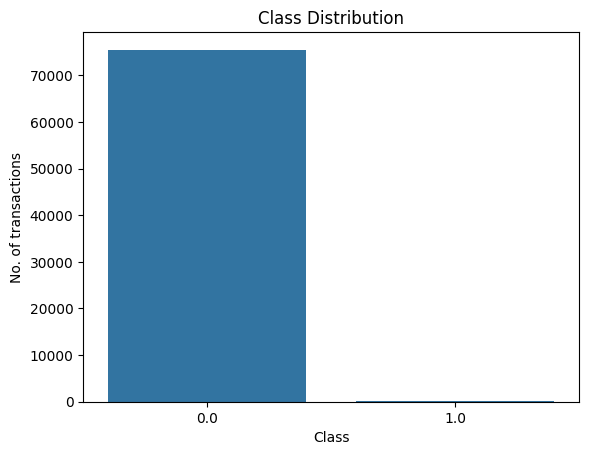

In [ ]:
sns.countplot(x = 'Class', data = df)
# df["Class"].value_counts().plot(kind = "bar")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("No. of transactions")
plt.show()

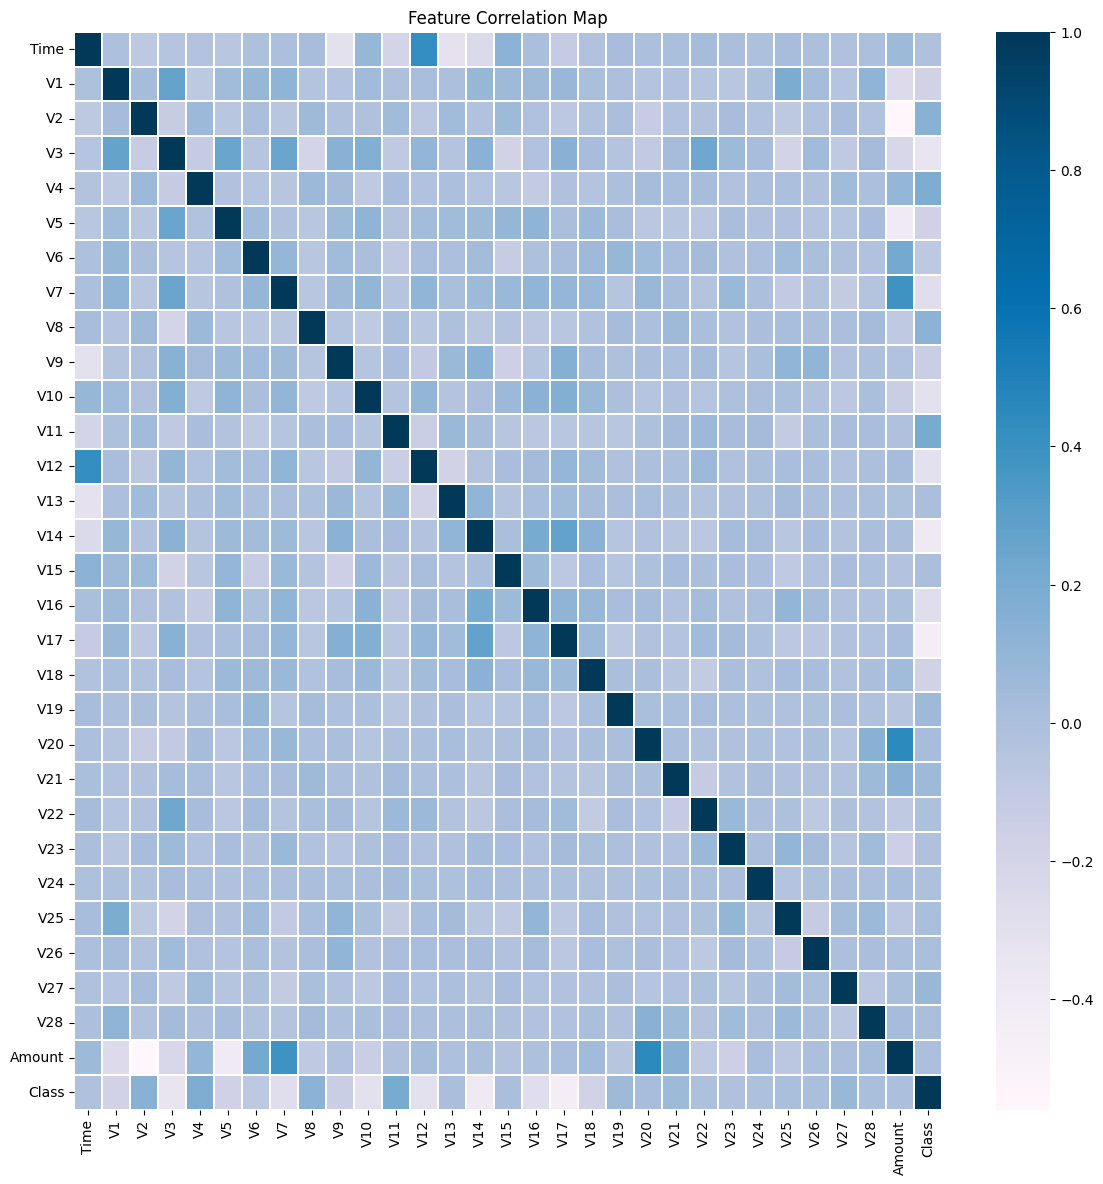

In [ ]:
plt.figure(figsize = (14, 14))
plt.title("Feature Correlation Map")
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = .1, cmap = "PuBu")
plt.show()

In [ ]:
# define predictors and target
target = "Class"
# all columns except class
predictors = df.columns.tolist()[:-1]

In [ ]:
# split the data
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42, shuffle = True)
train_df, valid_df = train_test_split(train_df, test_size = 0.2, random_state = 42, shuffle = True)

In [ ]:
x_train, x_valid, x_test = train_df[predictors], valid_df[predictors], test_df[predictors]
y_train, y_valid, y_test = train_df[target].values, valid_df[target].values, test_df[target].values

In [ ]:
clf = RandomForestClassifier(n_jobs = 4,
                            random_state = 42,
                            criterion = "gini",
                            n_estimators = 100,
                            verbose = False)

In [ ]:
print("Number of NaN values in 'Class' column before handling:", df['Class'].isnull().sum())

# Remove rows where 'Class' has NaN values
df_cleaned = df.dropna(subset=['Class'])

# Verify that NaNs in 'Class' are removed
print("Number of NaN values in 'Class' column after handling:", df_cleaned['Class'].isnull().sum())

# Separate features (X) and target (y) from the cleaned DataFrame
X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the training data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
print('Shape of X_train_scaled:', X_train_scaled.shape)
print('Shape of y_train:', y_train.shape)

Number of NaN values in 'Class' column before handling: 1
Number of NaN values in 'Class' column after handling: 0
Shape of X_train_scaled: (56752, 30)
Shape of y_train: (56752,)


In [ ]:
print(train_df[target].isnull().sum())
print(np.isnan(train_df[target].values).sum())

1
1


In [ ]:
print(f"Shape of train_df before dropping NaNs: {train_df.shape}")
train_df.dropna(subset=[target], inplace=True)
print(f"Shape of train_df after dropping NaNs: {train_df.shape}")
print(f"Number of NaNs in target after dropping: {train_df[target].isnull().sum()}")

# Now proceed with fitting the model
clf.fit(train_df[predictors], train_df[target].values)

Shape of train_df before dropping NaNs: (48428, 31)
Shape of train_df after dropping NaNs: (48427, 31)
Number of NaNs in target after dropping: 0


RandomForestClassifier(n_jobs=4, random_state=42, verbose=False)

In [ ]:
preds = clf.predict(valid_df[predictors])

In [ ]:
 clf.score(test_df[predictors], test_df[target].values)

0.9996696399074991

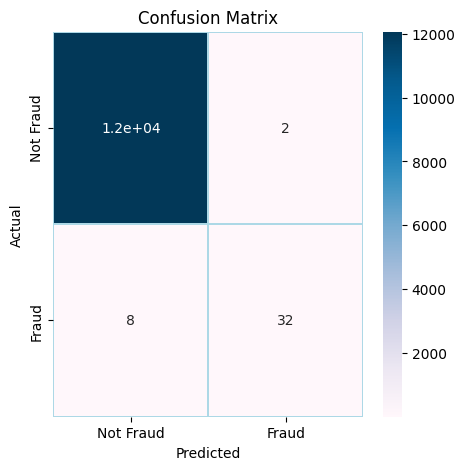

In [ ]:
# confusion matrix
cm = pd.crosstab(valid_df[target].values, preds, rownames = ['Actual'], colnames = ['Predicted'])
fig, ax1 = plt.subplots(ncols = 1, figsize = (5, 5))
sns.heatmap(cm, xticklabels = ["Not Fraud", "Fraud"], yticklabels = ["Not Fraud", "Fraud"], annot = True, ax = ax1, linewidth = .2, linecolor = "Lightblue", cmap = "PuBu")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# area under curve
from sklearn.metrics import roc_auc_score
roc_auc_score(valid_df[target].values, preds)

np.float64(0.8999171362280413)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state = 42, algorithm = "SAMME", learning_rate = 0.8, n_estimators = 100)

In [ ]:
print(f"Shape of train_df before dropping NaNs: {train_df.shape}")
train_df.dropna(subset=predictors, inplace=True)
print(f"Shape of train_df after dropping NaNs: {train_df.shape}")

# Now proceed with scaling and fitting

Shape of train_df before dropping NaNs: (48427, 31)
Shape of train_df after dropping NaNs: (48427, 31)


In [ ]:
# Identify columns with a high percentage of NaNs (e.g., > 50%)
missing_percentage = train_df[predictors].isnull().sum() / len(train_df)
cols_to_drop = missing_percentage[missing_percentage > 0.5].index.tolist()
print(f"Columns to drop due to high missing values: {cols_to_drop}")
predictors = [col for col in predictors if col not in cols_to_drop]
train_df.drop(cols_to_drop, axis=1, inplace=True)
test_df.drop(cols_to_drop, axis=1, inplace=True, errors='ignore') # Handle cases where test_df might not have these columns
valid_df.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

# Now proceed with scaling and fitting using the remaining predictors

Columns to drop due to high missing values: []


In [ ]:
from sklearn.impute import SimpleImputer

categorical_cols_with_nan = train_df[predictors].select_dtypes(include='object').columns[train_df[predictors].select_dtypes(include='object').isnull().any()].tolist()

if categorical_cols_with_nan:
    imputer_categorical = SimpleImputer(strategy='most_frequent')
    train_df[categorical_cols_with_nan] = imputer_categorical.fit_transform(train_df[categorical_cols_with_nan])
    test_df[categorical_cols_with_nan] = imputer_categorical.transform(test_df[categorical_cols_with_nan])
    valid_df[categorical_cols_with_nan] = imputer_categorical.transform(valid_df[categorical_cols_with_nan])

# Now proceed with scaling (if applicable) and fitting

In [ ]:
# area under curve
roc_auc_score(y_valid, preds)

np.float64(0.8999171362280413)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you already have X and y defined
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.model_selection import train_test_split

# Drop rows with NaNs before split
X_clean = X.dropna()
y_clean = y[X_clean.index]

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, stratify=y_clean)


Feature Importances:
   Feature  Importance
14     V14    0.210816
12     V12    0.123964
10     V10    0.123823
4       V4    0.094570
17     V17    0.089224
3       V3    0.069417
11     V11    0.059611
16     V16    0.040550
2       V2    0.039589
9       V9    0.025939
21     V21    0.015713
7       V7    0.013296
1       V1    0.009754
18     V18    0.008393
6       V6    0.008356
0     Time    0.007652
13     V13    0.005955
27     V27    0.005525
8       V8    0.005036
28     V28    0.004645
20     V20    0.004560
15     V15    0.004103
5       V5    0.004040
19     V19    0.003998
26     V26    0.003895
25     V25    0.003723
29  Amount    0.003627
22     V22    0.003574
24     V24    0.003497
23     V23    0.003154


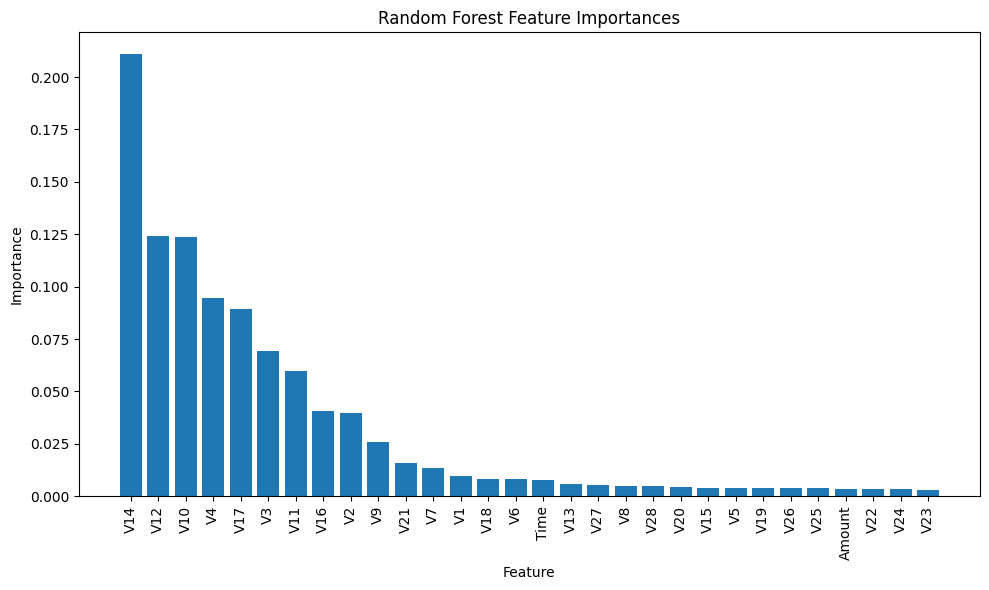


Classification Report with Selected Features (Random Forest):


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:399: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_true contains NaN.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

df = pd.read_csv("creditcard.csv")

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled_resampled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model to get feature importances
rf_feature_selection = RandomForestClassifier(n_estimators=100, random_state=42)
rf_feature_selection.fit(X_train_scaled_resampled, y_train_resampled)

# Get feature importances
importances = rf_feature_selection.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

# Select a subset of the most important features (e.g., top N)
top_n_features = feature_importance_df['Feature'][:10].tolist() # Select top 10
X_train_selected = X_train_resampled[top_n_features]
X_test_selected = X_test[top_n_features]

scaler_selected = StandardScaler()
X_train_scaled_selected = scaler_selected.fit_transform(X_train_selected)
X_test_scaled_selected = scaler_selected.transform(X_test_selected)

# Train and evaluate a model using the selected features
rf_selected = RandomForestClassifier(max_depth=5, random_state=0)
rf_selected.fit(X_train_scaled_selected, y_train_resampled)
y_pred_rf_selected = rf_selected.predict(X_test_scaled_selected)
print("\nClassification Report with Selected Features (Random Forest):")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf_selected))

In [ ]:
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)


X_test_scaled shape: (63138, 30)
y_test shape: (63138,)


In [ ]:
# If X_test_scaled is the reduced set, you need the matching y_test
# Make sure you retained the right y_test when transforming X_test_scaled

# You can zip back them together temporarily:
if X_test_scaled.shape[0] < y_test.shape[0]:
    y_test = y_test[:X_test_scaled.shape[0]]
elif X_test_scaled.shape[0] > y_test.shape[0]:
    X_test_scaled = X_test_scaled[:y_test.shape[0]]


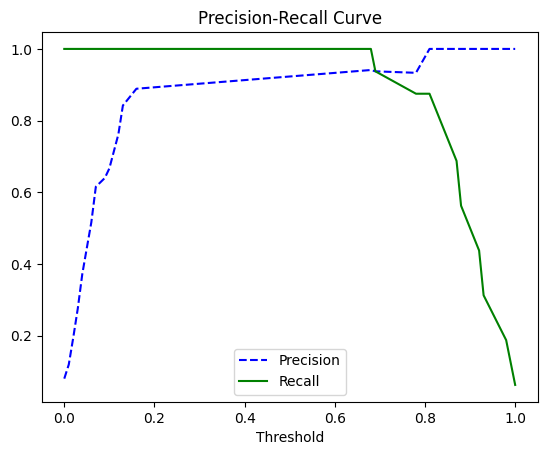

Optimal Threshold: 0.6800
Classification Report with Optimal Threshold (Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       184
           1       0.94      1.00      0.97        16

    accuracy                           0.99       200
   macro avg       0.97      1.00      0.98       200
weighted avg       1.00      0.99      1.00       200



In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Generate a synthetic imbalanced dataset for demonstration (replace with your actual data loading)
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(20)])
df['Class'] = y

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the scaled training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# --- Train Random Forest with SMOTE ---
rf_resampled = RandomForestClassifier(random_state=42)
rf_resampled.fit(X_train_resampled, y_train_resampled)

def plot_pr_curve(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recall[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend()
    plt.title("Precision-Recall Curve")
    plt.show()

def find_optimal_threshold(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    # You can choose the threshold that maximizes a specific metric, e.g., F1-score
    f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-8) # Avoid division by zero
    optimal_threshold_index = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_threshold_index]
    print(f"Optimal Threshold: {optimal_threshold:.4f}")
    return optimal_threshold

# Assuming you have a trained model (e.g., rf_resampled) and test data (X_test_scaled, y_test)
y_proba_rf = rf_resampled.predict_proba(X_test_scaled)[:, 1] # Get probability of being fraudulent

plot_pr_curve(y_test, y_proba_rf)
optimal_threshold_rf = find_optimal_threshold(y_test, y_proba_rf)

# Make predictions using the optimal threshold
y_pred_optimal_rf = (y_proba_rf >= optimal_threshold_rf).astype(int)

# Evaluate the model with the optimal threshold
print("Classification Report with Optimal Threshold (Random Forest):")
print(classification_report(y_test, y_pred_optimal_rf))

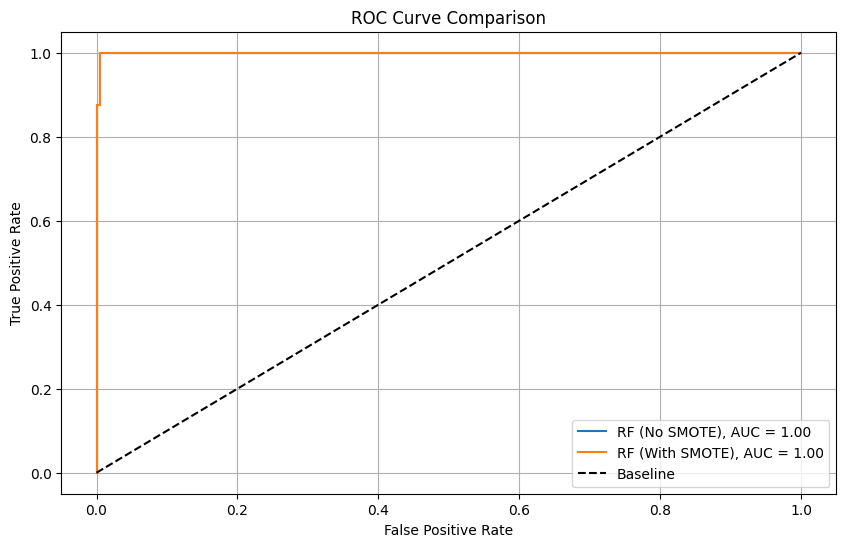

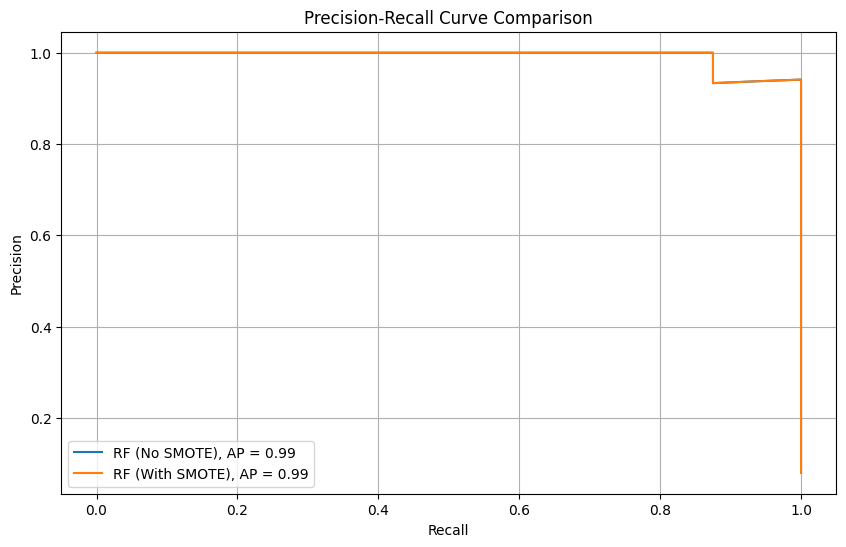


Classification Report - Random Forest (No SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       184
           1       0.94      1.00      0.97        16

    accuracy                           0.99       200
   macro avg       0.97      1.00      0.98       200
weighted avg       1.00      0.99      1.00       200


Classification Report - Random Forest (With SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       184
           1       0.94      1.00      0.97        16

    accuracy                           0.99       200
   macro avg       0.97      1.00      0.98       200
weighted avg       1.00      0.99      1.00       200



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Class', axis=1)
y = df['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model 1: Random Forest without SMOTE ---
rf_no_smote = RandomForestClassifier(random_state=42)
rf_no_smote.fit(X_train_scaled, y_train)
y_pred_rf_no_smote = rf_no_smote.predict(X_test_scaled)
y_proba_rf_no_smote = rf_no_smote.predict_proba(X_test_scaled)[:, 1]

# --- Model 2: Random Forest with SMOTE ---
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

rf_with_smote = RandomForestClassifier(random_state=42)
rf_with_smote.fit(X_train_resampled, y_train_resampled)
y_pred_rf_with_smote = rf_with_smote.predict(X_test_scaled)
y_proba_rf_with_smote = rf_with_smote.predict_proba(X_test_scaled)[:, 1]

# --- Plotting ROC Curves ---
plt.figure(figsize=(10, 6))
fpr_rf_no_smote, tpr_rf_no_smote, _ = roc_curve(y_test, y_proba_rf_no_smote)
auc_rf_no_smote = roc_auc_score(y_test, y_proba_rf_no_smote)
plt.plot(fpr_rf_no_smote, tpr_rf_no_smote, label=f'RF (No SMOTE), AUC = {auc_rf_no_smote:.2f}')

fpr_rf_with_smote, tpr_rf_with_smote, _ = roc_curve(y_test, y_proba_rf_with_smote)
auc_rf_with_smote = roc_auc_score(y_test, y_proba_rf_with_smote)
plt.plot(fpr_rf_with_smote, tpr_rf_with_smote, label=f'RF (With SMOTE), AUC = {auc_rf_with_smote:.2f}')

plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# --- Plotting Precision-Recall Curves ---
plt.figure(figsize=(10, 6))
precision_rf_no_smote, recall_rf_no_smote, _ = precision_recall_curve(y_test, y_proba_rf_no_smote)
ap_rf_no_smote = average_precision_score(y_test, y_proba_rf_no_smote)
plt.plot(recall_rf_no_smote, precision_rf_no_smote, label=f'RF (No SMOTE), AP = {ap_rf_no_smote:.2f}')

precision_rf_with_smote, recall_rf_with_smote, _ = precision_recall_curve(y_test, y_proba_rf_with_smote)
ap_rf_with_smote = average_precision_score(y_test, y_proba_rf_with_smote)
plt.plot(recall_rf_with_smote, precision_rf_with_smote, label=f'RF (With SMOTE), AP = {ap_rf_with_smote:.2f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# --- Precision-Recall Metrics (Classification Report) ---
print("\nClassification Report - Random Forest (No SMOTE):")
print(classification_report(y_test, y_pred_rf_no_smote))

print("\nClassification Report - Random Forest (With SMOTE):")
print(classification_report(y_test, y_pred_rf_with_smote))


--- Decision Tree (on SMOTE Data) ---
Accuracy: 0.9950
Precision: 0.9412
Recall: 1.0000
F1-Score: 0.9697
AUC: 0.9973
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       184
           1       0.94      1.00      0.97        16

    accuracy                           0.99       200
   macro avg       0.97      1.00      0.98       200
weighted avg       1.00      0.99      1.00       200


--- SVM (on SMOTE Data) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
AUC: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00        16

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


--- Logistic Regression (on SMOTE Data) ---
Accuracy: 0.9950
Precision: 0

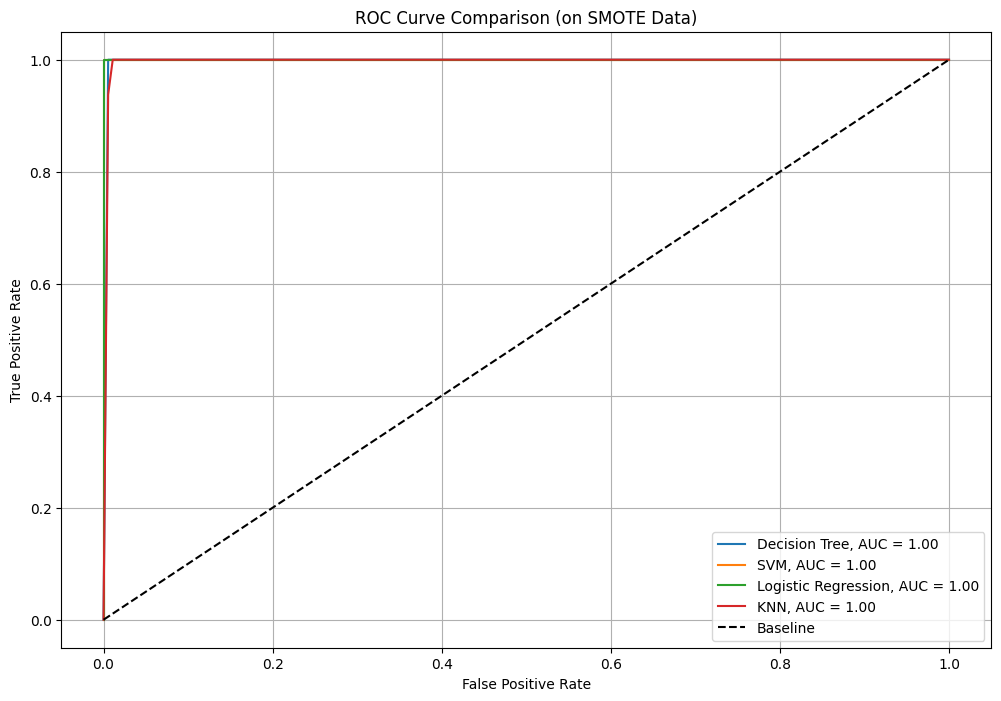

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Assuming you have your DataFrame 'df' and target column 'Class'
X = df.drop('Class', axis=1)
y = df['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the scaled training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# --- Train and Evaluate Models on SMOTE Data ---

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),  # probability=True for ROC curve
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

plt.figure(figsize=(12, 8))

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    print(f"\n--- {name} (on SMOTE Data) ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f'{name}, AUC = {auc:.2f}')

# Plot Baseline
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (on SMOTE Data)')
plt.legend()
plt.grid(True)
plt.show()